In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from pryngles import *
from pryngles import pixx
import time
#extension="pixx"
extension="cpixx"
import multiprocessing as mp

# Import local functions
import extra_func as efunc

In [11]:
num_array = np.array(["0_001","0_002","0_005","0_01","0_02","0_05","0_1","0_2","0_4","0_6","0_8",
                      "1_0","1_2","1_4","1_6","1_8","2_0","4_0","6_0","8_0","10_0","20_0"])
ring_i = 0 # 90 is edge-on, 0 is face-on
ring_l = 0
orbit_i_arr = np.linspace(10,90,9)# 90 is edge-on, 0 is face-on

params = []
for i,fou_file_num in enumerate(num_array):
    params.append([fou_file_num,orbit_i_arr,ring_i,ring_l])
    
if __name__ == '__main__':
    efunc.pool_handler(len(num_array),params,efunc.opticalThicknessTest,1)



 start file:  0_001


 start file:  0_002


 start file:  0_005


 start file:  0_01


 start file:  0_02


 start file:  0_05


 start file:  0_1


 start file:  0_2


 start file:  0_4


 start file:  0_6


 start file:  0_8


 start file:  1_0


 start file:  1_2


 start file:  1_4


 start file:  1_6


 start file:  1_8


 start file:  2_0


 start file:  4_0


 start file:  6_0


 start file:  8_0


 start file:  10_0


 start file:  20_0


In [21]:
flux = np.zeros((len(num_array),len(orbit_i_arr)))
degree = np.zeros((len(num_array),len(orbit_i_arr)))
pflux = np.zeros((len(num_array),len(orbit_i_arr)))
for i,fou_file_num in enumerate(num_array):
    with open(f"./data/optical_thickness/opt_thickness_{fou_file_num}.pkl","rb") as f:
        save_file = pickle.load(f)
    stokes = save_file["Flux"]
    flux[i,:] = stokes[:,0]
    degree[i,:] = save_file["Degree"]
    pflux[i,:] = np.sqrt(stokes[:,1]**2 + stokes[:,2]**2)
    illum_angle = save_file["illum"]

illum_angle = np.arccos(abs(illum_angle))*180/np.pi

<IPython.core.display.Javascript object>


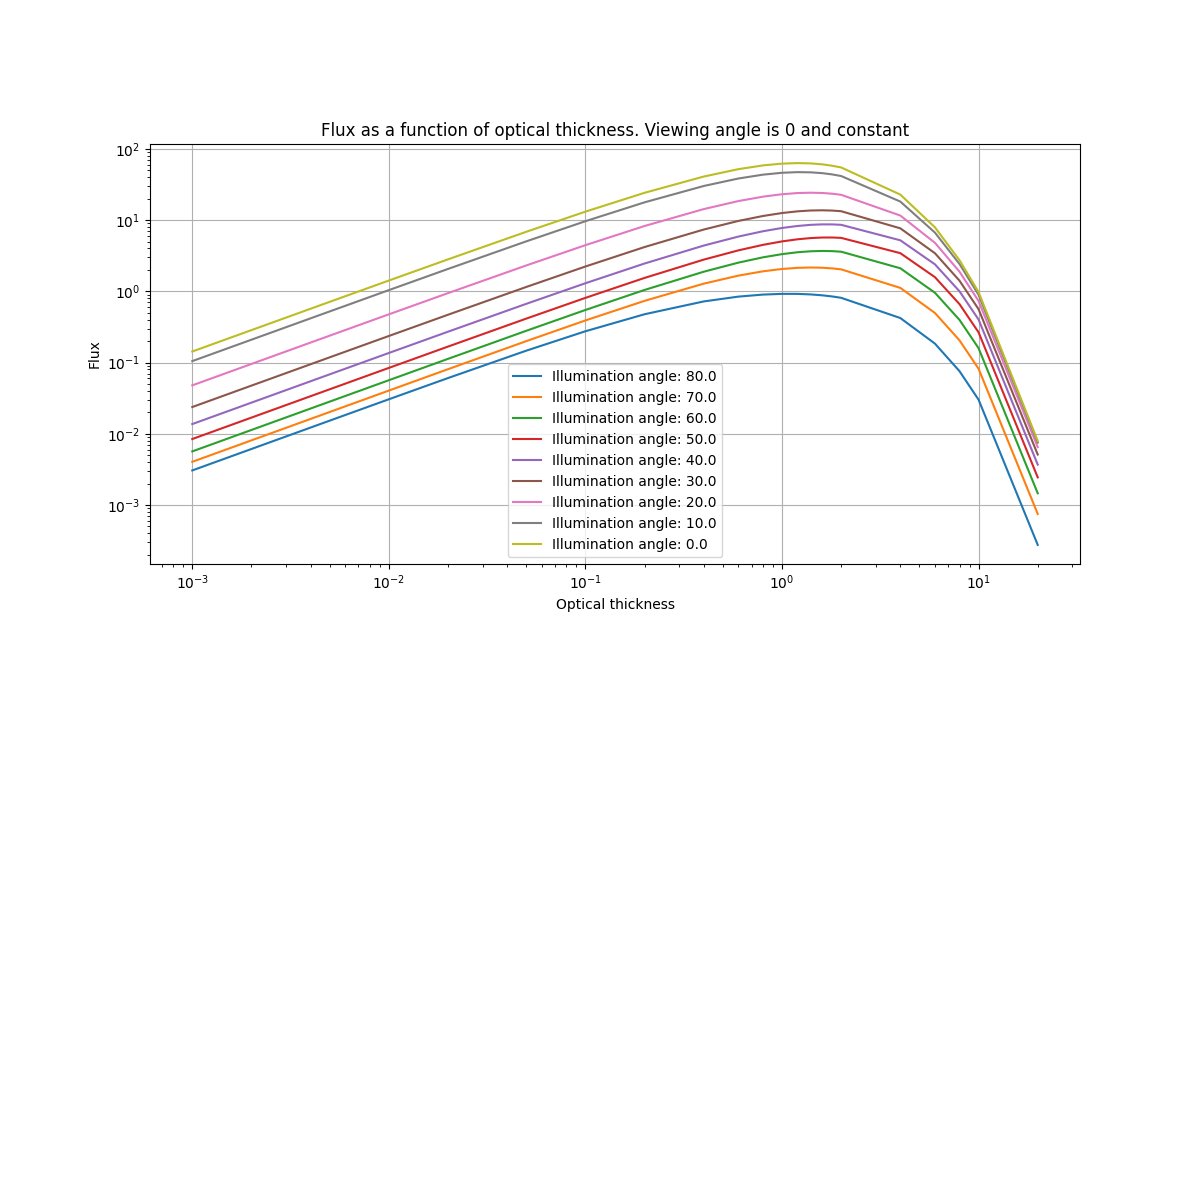

In [22]:
x = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.6,0.8,
              1.0,1.2,1.4,1.6,1.8,2.0,4.0,6.0,8.0,10.0,20.0])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 1, 1)
for jj,o_i in enumerate(orbit_i_arr):
    ax.plot(x,flux[:,jj],label=f"Illumination angle: {round(illum_angle[jj],1)}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Optical thickness")
ax.set_ylabel("Flux")
ax.set_title("Flux as a function of optical thickness. Viewing angle is 0 and constant")
plt.legend()
plt.grid()
plt.savefig('/home/allard/Images/opticalthickness_vs_flux.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


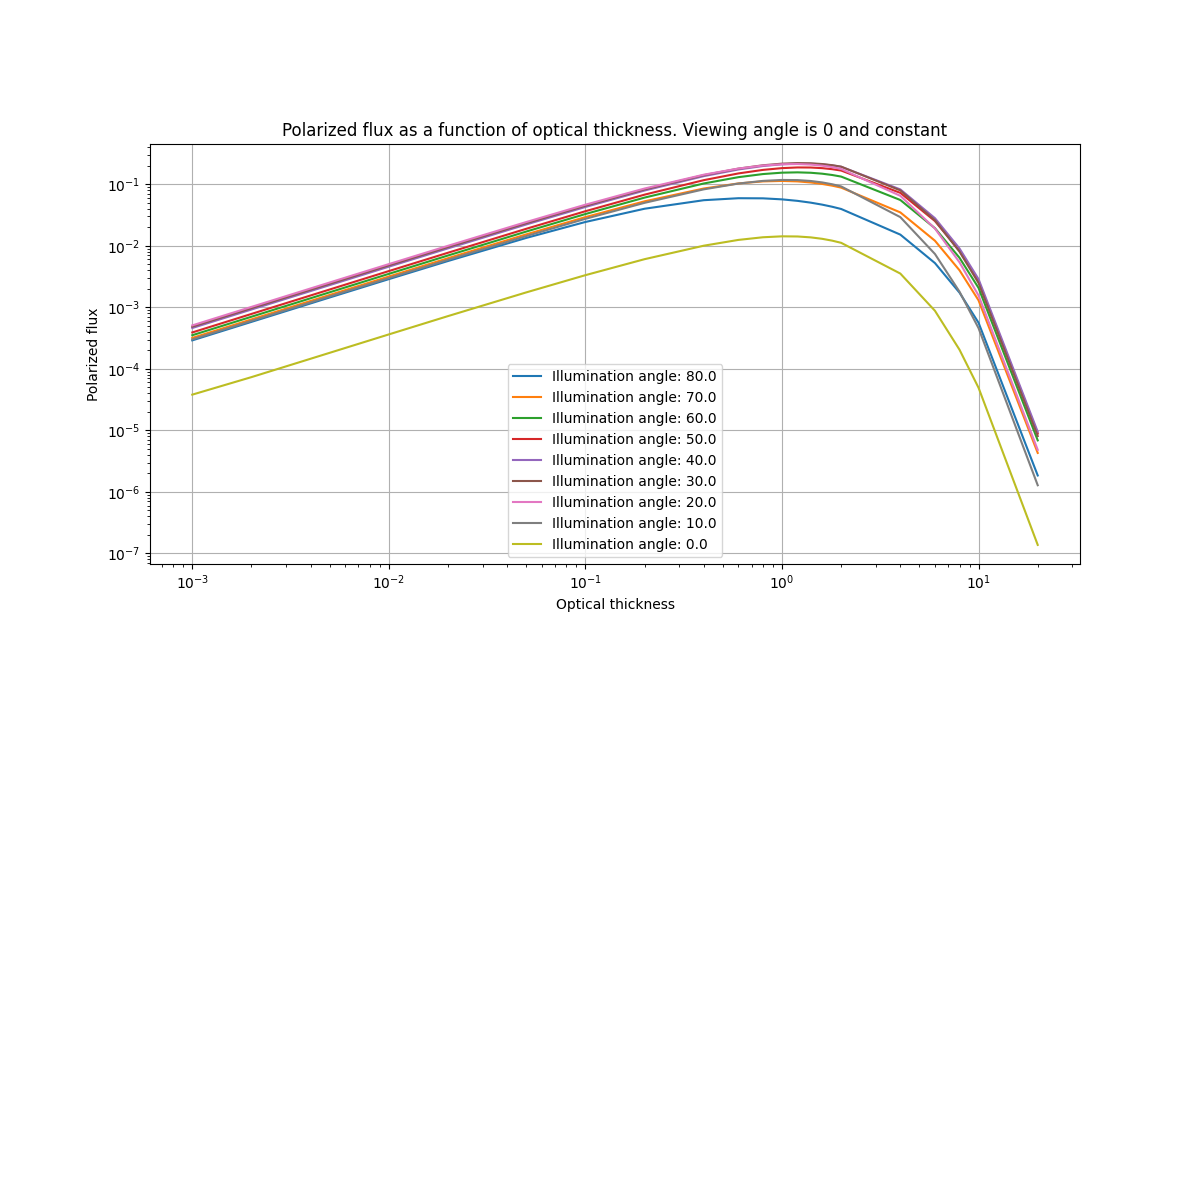

In [19]:
x = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.6,0.8,
              1.0,1.2,1.4,1.6,1.8,2.0,4.0,6.0,8.0,10.0,20.0])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 1, 1)
for jj,o_i in enumerate(orbit_i_arr):
    ax.plot(x,pflux[:,jj],label=f"Illumination angle: {round(illum_angle[jj],1)}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Optical thickness")
ax.set_ylabel("Polarized flux")
ax.set_title("Polarized flux as a function of optical thickness. Viewing angle is 0 and constant")
plt.legend()
plt.grid()
plt.savefig('/home/allard/Images/opticalthickness_vs_pflux.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


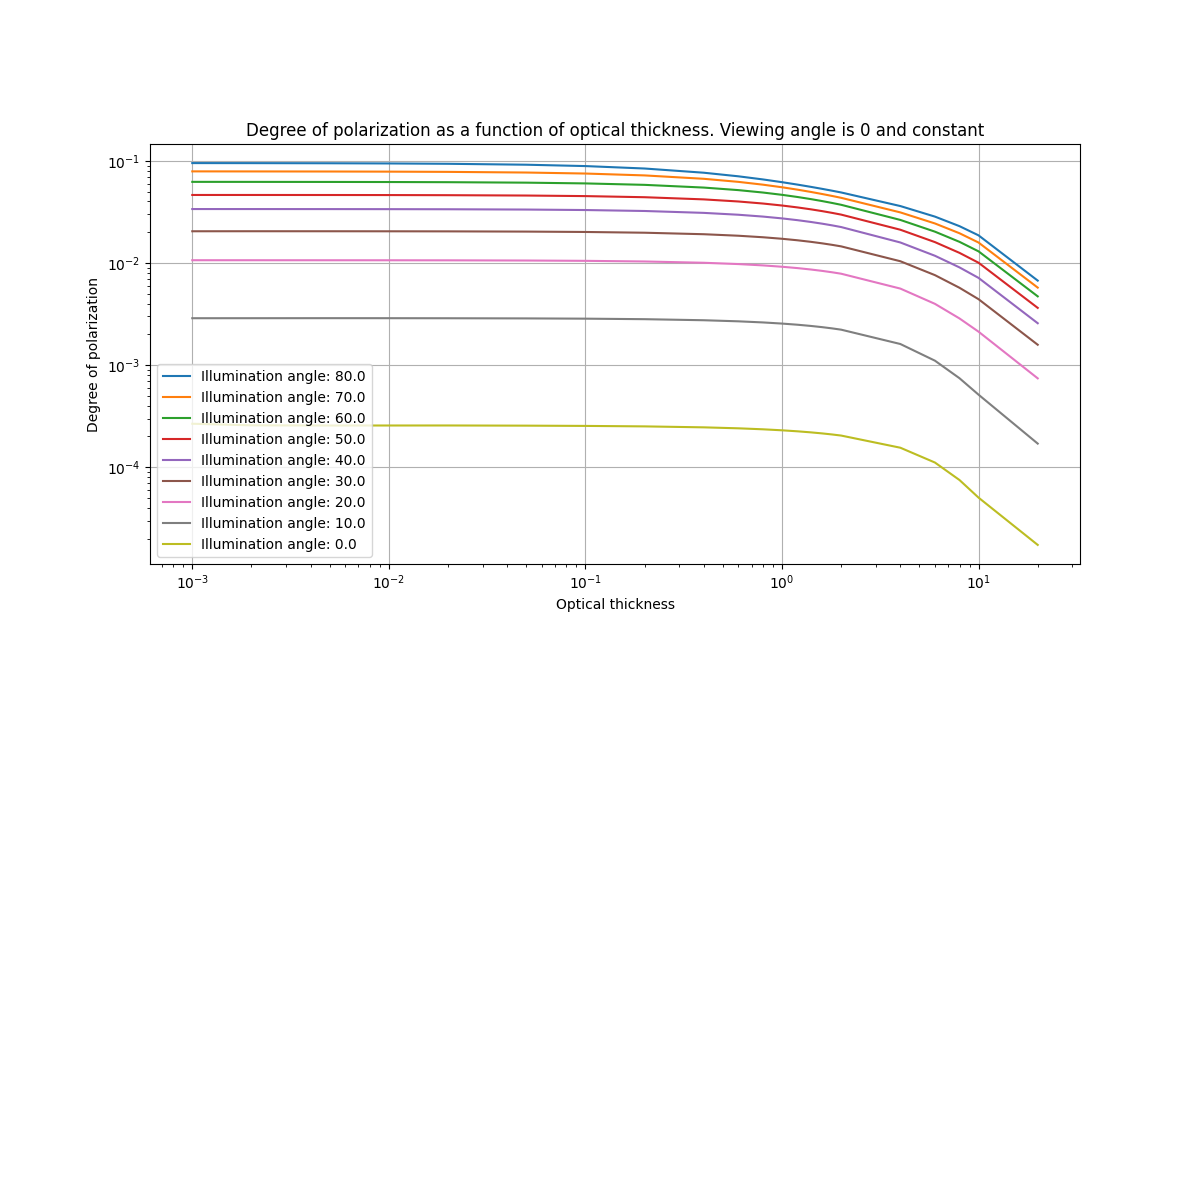

In [20]:
x = np.array([0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.6,0.8,
              1.0,1.2,1.4,1.6,1.8,2.0,4.0,6.0,8.0,10.0,20.0])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 1, 1)
for jj,o_i in enumerate(orbit_i_arr):
    ax.plot(x,abs(degree[:,jj]),label=f"Illumination angle: {round(illum_angle[jj],1)}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Optical thickness")
ax.set_ylabel("Degree of polarization")
ax.set_title("Degree of polarization as a function of optical thickness. Viewing angle is 0 and constant")
plt.legend()
plt.grid()
plt.savefig('/home/allard/Images/opticalthickness_vs_degree.png', dpi=300)
plt.show()